# Characteristic Radii vs $\beta$

In this notebook we will make graphs for $R_c$, $R_{90}$ and $\theta_c$ vs $\beta$ for different values of $\xi$
with  fixed inclination $(i=0)$

Equations for the characteristic radii:
\begin{align}
\tilde{R}_{90} &= \frac{\sqrt{3\xi}(1+\beta^{1/2})}{(1-\xi\beta)\left(1+\frac{1}{5}\xi\beta\right)^{1/2}} \\
\tilde{R}_c &= \frac{1}{1-2\gamma} \\
\gamma &= \frac{1}{6} \left( 1 + 2 \beta^{1/2} \right) + \frac{C_{k\beta}}{1 + \beta^{1/2}} \\
C_{k\beta} &= \frac{1}{30} \left(1 - \beta - \frac94 k \right) \\
k &= \frac{2}{\xi}-2 \\
\tan\theta_c &= \pm\left|B^2-2A\right|^{1/2}
\end{align}

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def A(b, xi):
    """
    Returns the radius of curvature normalized with R0

    Corrected version that also depends on anisotropy index k

    xi = 2/(k+2) => k = 2 (1/xi - 1)
    """
    k = 2*(1./xi - 1.)
    sb = np.sqrt(b)
    c = (1 - b - 9.0*k/4.0)/30.0
    alpha = (1.0 + 2*sb)/6.0 + c/(1 + sb)
    return 1./(1.0-2*alpha)

In [3]:
def th1_90_method1(beta, xi):
    x = 3*beta*xi
    return np.sqrt(x/(1 + x/5))

def th1_90_method2(beta, xi):
    return np.sqrt(2.5*(np.sqrt(1.0 + 12*xi*beta/5.0) - 1.0))

In [4]:
def B(beta,xi=1.0, th1_90=th1_90_method1):
    """
    Returns R_90 normalized with R_0
    """
    numerator = (1+np.sqrt(beta))*th1_90(beta, xi)
    denominator = (1.-xi*beta)*np.sqrt(beta)
    return numerator/denominator

In [5]:
def theta_c(beta,xi=1.0):
    """
    theta_c defines the excentricity of a given conic
    """
    Acurv = A(beta,xi)
    B90 = B(beta, xi)
    arg = 2*Acurv - B90**2
    return np.sign(arg)*np.arctan(np.sqrt(np.abs(arg)))

## Defining arrays for $\beta$ and $\xi$

In [6]:
beta = np.linspace(0.0,0.2,1000)
xi = [0.1,0.2,0.4,0.6,0.8,1.0]
xcolors = sns.color_palette("gnuplot",len(xi))

### start plotting

In [7]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

### Show both radii on the same graph

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


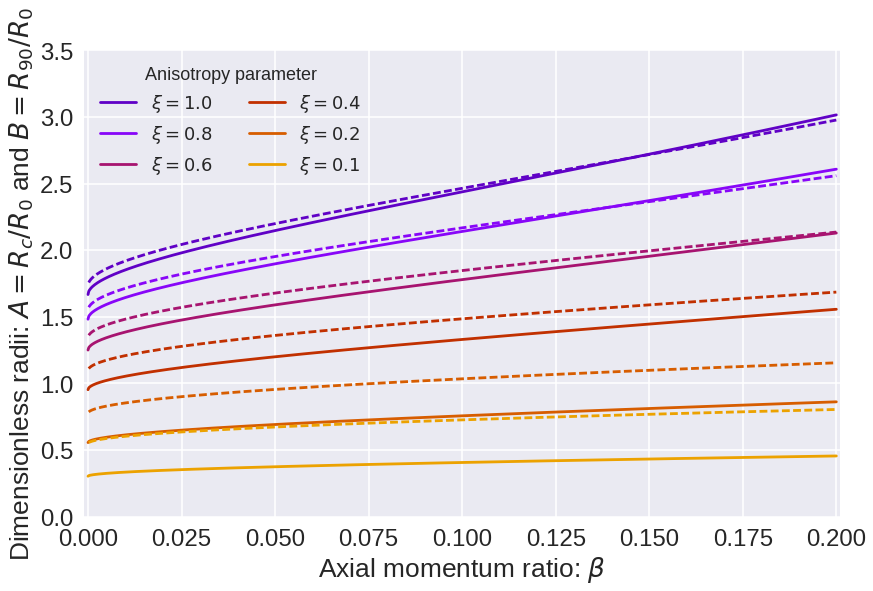

In [8]:
sns.set_context('poster', font_scale=1.5)
labelsize = 18
for x,xc in zip(reversed(xi), xcolors):
    ACurv = A(beta,x)
    plt.plot(beta,ACurv,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
    Bnorm = B(beta,x, th1_90=th1_90_method2)
    plt.plot(beta,Bnorm,linestyle = "--",color=xc,label=None)    
leg = plt.legend(loc='upper left', fontsize=labelsize, ncol=2, title='Anisotropy parameter')
leg.get_title().set_fontsize(labelsize)
plt.xlabel(r"Axial momentum ratio: $\beta$")
plt.ylabel(r"Dimensionless radii: $A=R_c/R_0$ and $B=R_{90}/R_0$")
plt.ylim(0.0, 3.5)
plt.xlim(-0.001, 0.201)
plt.tight_layout()
plt.savefig("AB-beta.pdf");

#### $A$ vs $\beta$

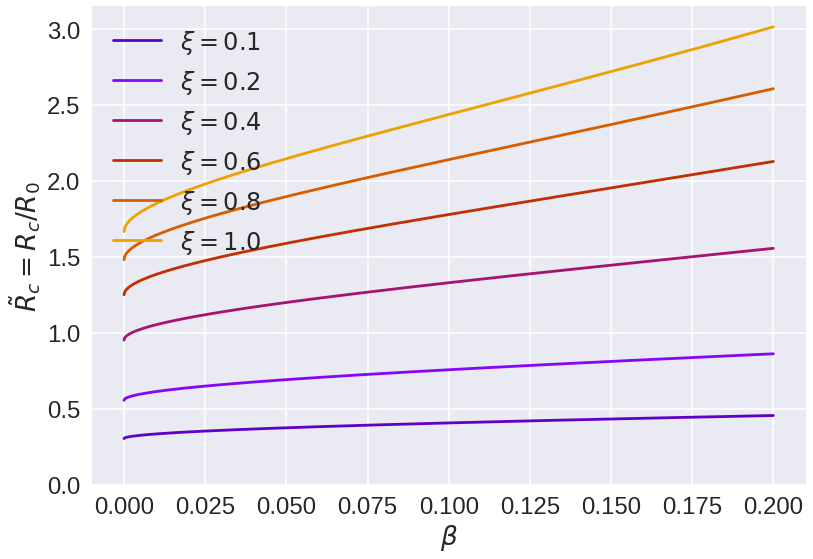

In [9]:
sns.set_context('poster', font_scale=1.5)
for x,xc in zip(xi,xcolors):
    ACurv = A(beta,x)
    plt.plot(beta,ACurv,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
plt.legend()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\tilde{R}_c=R_c/R_0$")
plt.ylim(0.0, None)
plt.savefig("A-beta.pdf");

#### $B$ vs $\beta$

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


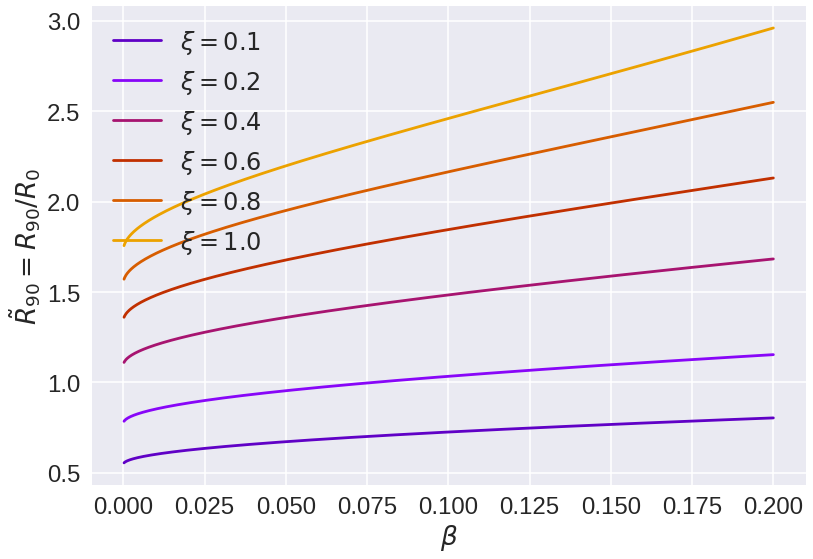

In [10]:
for x,xc in zip(xi,xcolors):
    Bnorm = B(beta,x)
    plt.plot(beta,Bnorm,linestyle = "-",color=xc,label=r"$\xi={}$".format(x))
plt.legend()
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\tilde{R}_{90}=R_{90}/R_0$")
plt.savefig("B-beta.pdf");

#### $\theta_c$ vs $\beta$

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


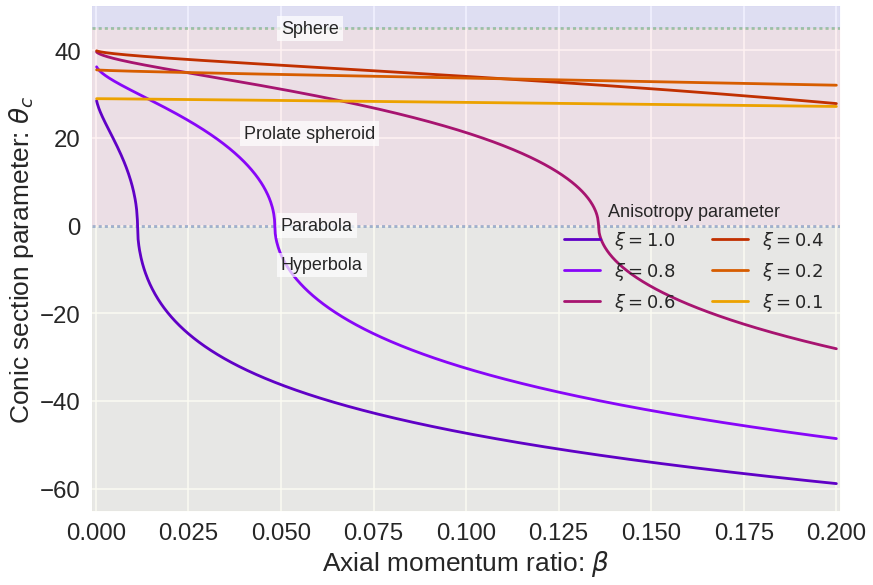

In [11]:
sns.set_context('poster', font_scale=1.5)
labelsize = 18
xmin, xmax = -0.001, 0.201
ymin, ymax = -65.0, 50.0
plt.fill_between([xmin, xmax], [ymin, ymin], [0, 0], color='y', alpha=0.05)
plt.fill_between([xmin, xmax], [0, 0], [45, 45], color='r', alpha=0.05)
plt.fill_between([xmin, xmax], [45, 45], [ymax, ymax], color='b', alpha=0.05)
wbox=dict(facecolor='white', alpha=0.7, ec='none')
#plt.text(0.04, 47.0, 'Oblate spheroid', bbox=wbox, fontsize=labelsize)
plt.text(0.04, 20.0, 'Prolate spheroid', bbox=wbox, fontsize=labelsize)
plt.text(0.05, -10.0, 'Hyperbola', bbox=wbox, fontsize=labelsize)
plt.plot([xmin, xmax], [0.0, 0.0], ':', alpha=0.5)
plt.plot([xmin, xmax], [45.0, 45.0], ':', alpha=0.5)
plt.text(0.05, 45.0, 'Sphere', va='center', bbox=wbox, fontsize=labelsize)
plt.text(0.05, 0.0, 'Parabola', va='center', bbox=wbox, fontsize=labelsize)
for x,xc in zip(reversed(xi),xcolors):
    thc = np.degrees(theta_c(beta,x))
    plt.plot(beta,thc,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
leg = plt.legend(loc='right', fontsize=labelsize, ncol=2, title='Anisotropy parameter')
leg.get_title().set_fontsize(labelsize)
plt.xlabel(r"Axial momentum ratio: $\beta$")
plt.ylabel(r"Conic section parameter: $\theta_c$")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.tight_layout()
plt.savefig("thc-beta.pdf");

# New versions of graphs with log scale and including tail angle

In [12]:
beta = np.logspace(-3.0,-0.05,1000)
xi = [0.1,0.2,0.4,0.6,0.8,1.0]
xcolors = sns.color_palette("gnuplot",len(xi))

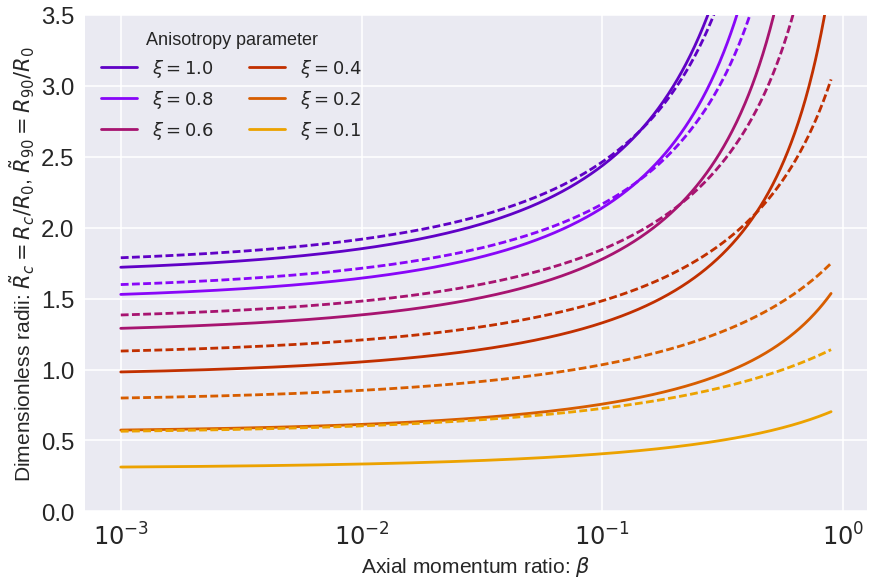

In [13]:
sns.set_context('poster', font_scale=1.5)
labelsize = 18
for x,xc in zip(reversed(xi), xcolors):
    ACurv = A(beta,x)
    plt.plot(beta,ACurv,linestyle="-",color=xc,label=r"$\xi={}$".format(x))
    Bnorm = B(beta,x, th1_90=th1_90_method2)
    plt.plot(beta,Bnorm,linestyle = "--",color=xc,label=None)    
leg = plt.legend(loc='upper left', fontsize=labelsize, ncol=2, title='Anisotropy parameter')
leg.get_title().set_fontsize(labelsize)
plt.xlabel(r"Axial momentum ratio: $\beta$", fontsize=labelsize+3)
plt.ylabel(r"Dimensionless radii: $\tilde{R}_c=R_c/R_0$, $\tilde{R}_{90}=R_{90}/R_0$", fontsize=labelsize+3)
plt.ylim(0.0, 3.5)
#plt.xlim(-0.001, 0.201)
plt.xscale('log')
plt.tight_layout()
plt.savefig("../papers/Paper1/figs/AB-beta-log.pdf");

Next cell is functions copied from t_infty-analyis.ipynb

In [14]:
from scipy.optimize import fsolve
from scipy.special import gamma as gamma_func

def finf(th, beta, xi):
    k = 2./xi-2
    C = (k+2*(1-beta))/(k+2)
    I = np.sqrt(np.pi)*gamma_func(0.5*(k+1))/(4*gamma_func(0.5*k+2))
    D = np.pi + 2*beta*I
    return th - C*np.tan(th) -D

def finf_CRW(th, beta):
    return th - np.tan(th) - np.pi/(1.0 -beta)


def theta_tail(beta, xi, f=finf, th_init=np.radians(91.0)):
    thinf = np.empty_like(beta)
    for i, b in enumerate(beta):
        thinf[i] = fsolve(f, th_init, args=(b,xi))
    return np.pi - thinf

In [15]:
thinf_iso = np.empty_like(beta)
for i, b in enumerate(beta):
    thinf_iso[i] = fsolve(finf_CRW, np.radians(91.0), args=(b))

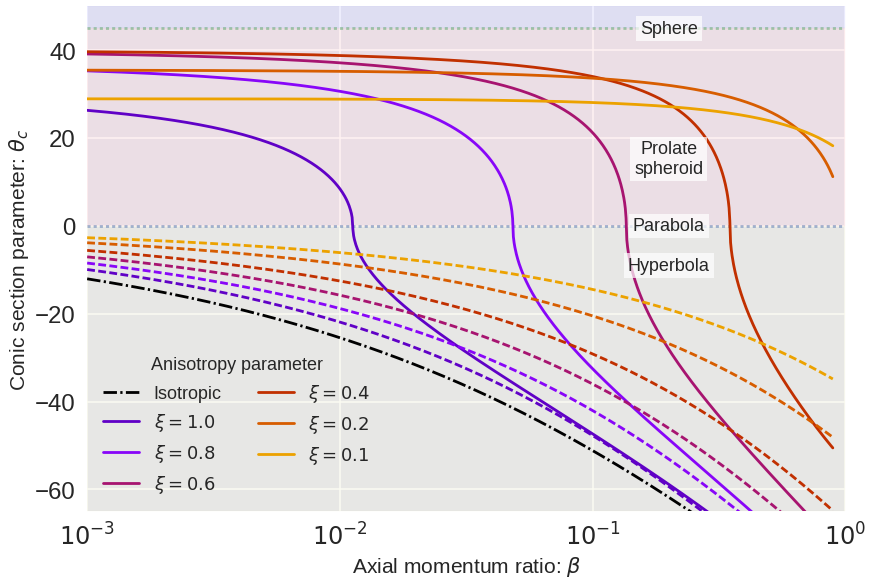

In [16]:
sns.set_context('poster', font_scale=1.5)
labelsize = 18
xmin, xmax = 0.001, 1.0
ymin, ymax = -65.0, 50.0
plt.fill_between([xmin, xmax], [ymin, ymin], [0, 0], color='y', alpha=0.05)
plt.fill_between([xmin, xmax], [0, 0], [45, 45], color='r', alpha=0.05)
plt.fill_between([xmin, xmax], [45, 45], [ymax, ymax], color='b', alpha=0.05)
wbox=dict(facecolor='white', alpha=0.7, ec='none')
#plt.text(0.04, 47.0, 'Oblate spheroid', bbox=wbox, fontsize=labelsize)
plt.text(0.2, 12.0, 'Prolate\nspheroid', ha='center', bbox=wbox, fontsize=labelsize)
plt.text(0.2, -10.0, 'Hyperbola', ha='center', bbox=wbox, fontsize=labelsize)
plt.plot([xmin, xmax], [0.0, 0.0], ':', alpha=0.5)
plt.plot([xmin, xmax], [45.0, 45.0], ':', alpha=0.5)
plt.text(0.2, 45.0, 'Sphere', va='center', ha='center', bbox=wbox, fontsize=labelsize)
plt.text(0.2, 0.0, 'Parabola', va='center', ha='center', bbox=wbox, fontsize=labelsize)
#Plot isotropic case:
plt.plot(beta,np.degrees(thinf_iso-np.pi),linestyle="-.",color="k",label="Isotropic")
for x,xc in zip(reversed(xi),xcolors):
    thc = np.degrees(theta_c(beta,x))
    thct = np.degrees(-theta_tail(beta, x))
    plt.plot(beta, thc, linestyle="-", color=xc, label=r"$\xi={}$".format(x))
    plt.plot(beta, thct, linestyle="--", color=xc, label=None)
leg = plt.legend(loc='lower left', fontsize=labelsize, ncol=2, title='Anisotropy parameter')
leg.get_title().set_fontsize(labelsize)
plt.xlabel(r"Axial momentum ratio: $\beta$", fontsize=labelsize+3)
plt.ylabel(r"Conic section parameter: $\theta_c$", fontsize=labelsize+3)
plt.xscale('log')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.tight_layout()
plt.savefig("../papers/Paper1/figs/thc-beta-log.pdf");

# Graph $R'_0$ vs inclination

I have the equations for the projected characteristic radii:
\begin{align}
\frac{q'}{q} = 1 \pm \tilde{R}_c\cot^2\theta_c\left(f(i;\theta_c)-1\right)
\end{align}
where:
\begin{align}
f(i;\theta_c) = \left(1 \pm \tan^2\theta_c\tan^2 i\right)^{1/2}
\end{align}

In [17]:
inc = np.linspace(0, 90)
Rct = 2.0
thc = [-45.0, -30.0, -15.0, 15.0, 30.0, 45.0]

In [18]:
def f_i_tc(i, tc):
    """
    Recurrent function in projected characteristic radii
    """
    tan_tc = np.tan(np.radians(tc))
    tan_i = np.tan(np.radians(i))
    return np.sqrt(1 + np.sign(tc)*tan_tc**2*tan_i**2)

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


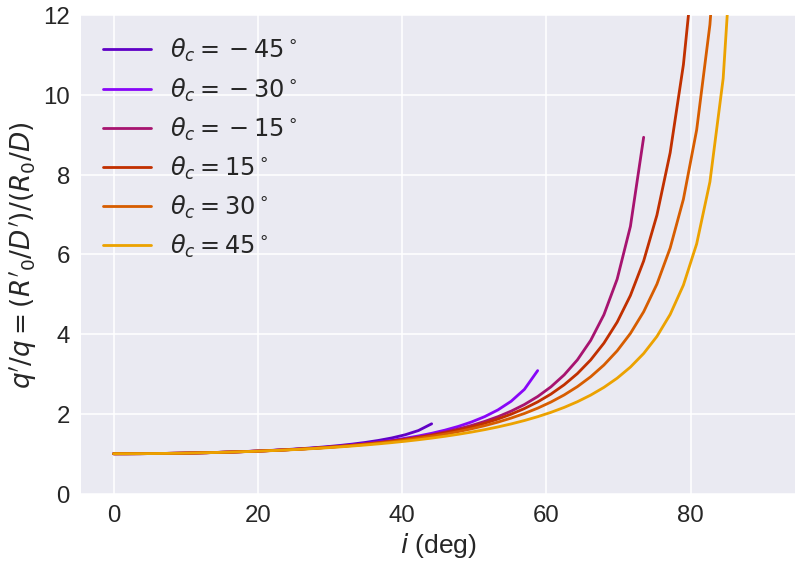

In [19]:
Tcolors = sns.color_palette("gnuplot",len(thc))
for t,c in zip(thc,Tcolors):
    qprimeq = 1 + np.sign(t)*(f_i_tc(inc, t)-1)/np.tan(np.radians(t))**2
    plt.plot(inc, qprimeq, c=c, label=r"$\theta_c={:.0f}^\circ$".format(t))
plt.legend()
plt.ylim(0,12)
plt.xlabel(r"$i$ (deg)")
plt.ylabel(r"$q'/q = (R'_0/D')/(R_0/D)$")
plt.savefig("../papers/Paper1/figs/qprime-vs-inc.pdf")

# Graph $\tilde{R}_c$ and $\tilde{R}_{90}$ vs inclination

For the projected radius of curvature and $R_{90}$ we have the following:
\begin{align}
\tilde{R}'_c &= \frac{\tilde{R}_c}{\cos^2 i f(i;\theta_c)\frac{q'}{q}} \\
\tilde{R}'_{90} &= \frac{\left[2\tilde{R}_c f(i;\theta_c) \mp \tan^2\theta_c \frac{q'}{q}\right]^{1/2}}
{\frac{q'}{q}f(i;\theta_c)\cos i }
\end{align}

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


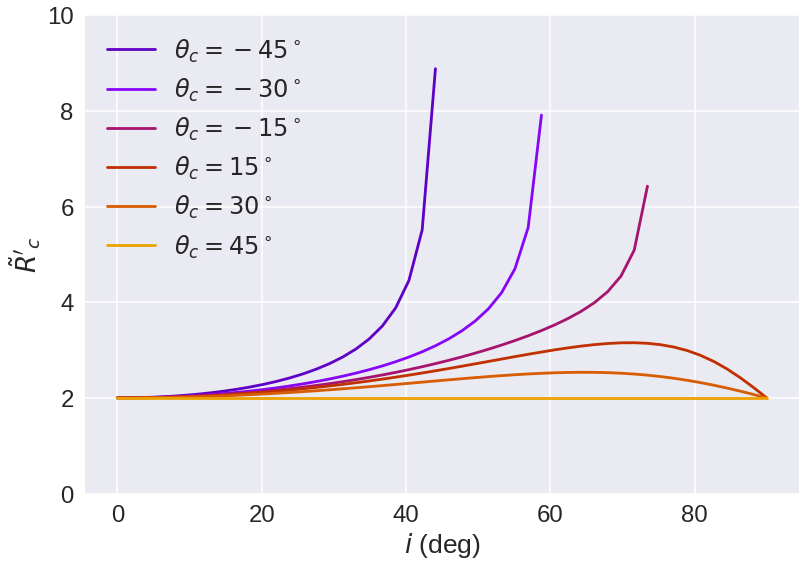

In [21]:
for t,c in zip(thc,Tcolors):
    qprimeq = 1 + np.sign(t)*(f_i_tc(inc, t)-1)/np.tan(np.radians(t))**2
    Rcpt = Rct/(np.cos(np.radians(inc))**2*f_i_tc(inc, t)*qprimeq) 
    plt.plot(inc, Rcpt, c=c, label=r"$\theta_c={:.0f}^\circ$".format(t))
plt.legend()
plt.ylim(0,10)
plt.xlabel(r"$i$ (deg)")
plt.ylabel(r"$\tilde{R}'_c$")
plt.savefig("../papers/Paper1/figs/projRcurv-vs-inc.pdf")

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


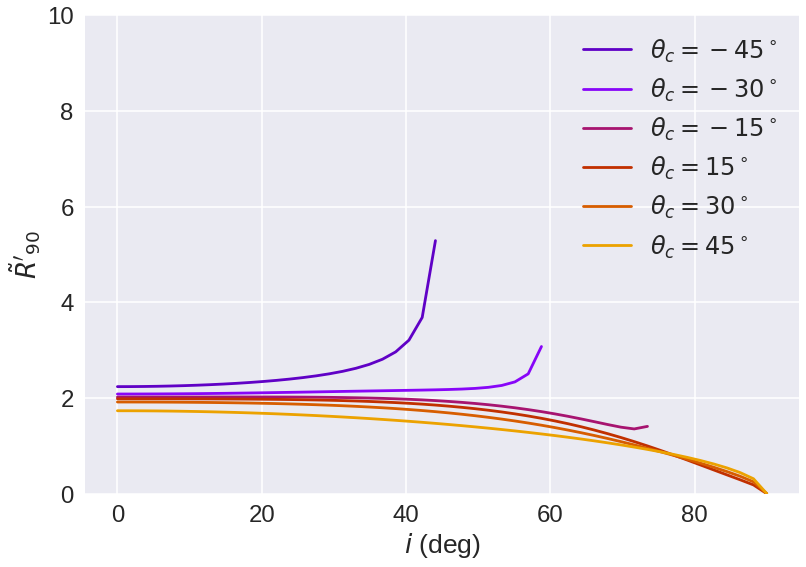

In [40]:
for t,c in zip(thc,Tcolors):
    qprimeq = 1 + np.sign(t)*(f_i_tc(inc, t)-1)/np.tan(np.radians(t))**2
    R90pt = np.sqrt(2*Rct*f_i_tc(inc, t) - np.sign(t)*np.tan(np.radians(t))**2*qprimeq)/(np.cos(np.radians(inc))*f_i_tc(inc, t)*qprimeq) 
    plt.plot(inc, R90pt, c=c, label=r"$\theta_c={:.0f}^\circ$".format(t))
plt.legend()
plt.ylim(0,10)
plt.xlabel(r"$i$ (deg)")
plt.ylabel(r"$\tilde{R}'_{90}$")
plt.savefig("../papers/Paper1/figs/projR90-vs-inc.pdf")

# Graph the discriminant $T'_c\equiv 2\tilde{R}'_c- \tilde{R}'^2_{90}$ vs $\tilde{R}'_c$

/home/lxndrs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


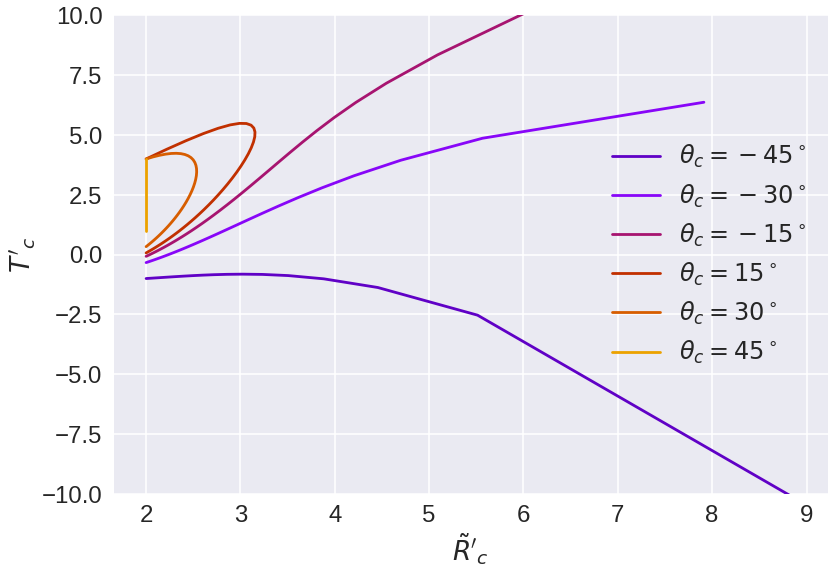

In [41]:
for t,c in zip(thc,Tcolors):
    qprimeq = 1 + np.sign(t)*(f_i_tc(inc, t)-1)/np.tan(np.radians(t))**2
    R90pt = np.sqrt(2*Rct*f_i_tc(inc, t) - np.sign(t)*np.tan(np.radians(t))**2*qprimeq)/(np.cos(np.radians(inc))*f_i_tc(inc, t)*qprimeq)
    Rcpt = Rct/(np.cos(np.radians(inc))**2*f_i_tc(inc, t)*qprimeq)
    Tc = 2*Rcpt-R90pt**2
    plt.plot(Rcpt, Tc, c=c, label=r"$\theta_c={:.0f}^\circ$".format(t))
plt.legend()
plt.ylim(-10,10)
plt.xlabel(r"$\tilde{R}'_c$")
ylabel = r"$T'_c$"
plt.ylabel(ylabel)
#plt.savefig("../papers/Paper1/figs/Tc-vs-projRcurv.pdf")